# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Описание проекта 
   
   Есть данные от кредитного отдела банка, содержащие статистику платежеспособности клиентов. 
   
    
   Нужно проверить гипотезы о том, что количество детей, семейное положение, уровень дохода и цель кредита влияют на факт погашения задолженности в срок.
    
    
   Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.
   

## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [3]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [7]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [8]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [14]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [15]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [16]:
data.duplicated().sum()

71

In [17]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [18]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [21]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [22]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [23]:
#построим сводную таблицу, сгруппировав данные по количеству детей
#для каждой группы подсчитаем общее количество выданных кредитов (метод count применяем к столбцу debt)
# и количество кредитов с просроченной задолженностью (метод sum применяем к столбцу debt)

data_pivot_children =  data.pivot_table(index='children', values = 'debt', aggfunc=['count', 'sum'])

# к сводной таблице добавим столбец с показателями overdue_ratio - долей просроченной задолженности в общем объеме кредитов
# поскольку все пропуски данных были ранее обработаны, деление на 0 в данном случае невозможно
# умножим показатель overdue_ratio на 100, чтобы получить данные в %

data_pivot_children['overdue_ratio'] = (data_pivot_children['sum'] / data_pivot_children['count'])*100 

# переименуем столбцы сводной таблицы для наглядности представления
# total_loans - общее количество выданных кредитов, debt - количество кредитов с просроченной задолженностью

data_pivot_children = data_pivot_children.rename(columns = {'count' : 'total_loans', 'sum': 'debts', 'debt':' '})
data_pivot_children

,total_loans,debts,overdue_ratio
,,,
children,,,
0,14091,1063,7.543822
1,4808,444,9.234609
2,2052,194,9.454191
3,330,27,8.181818
4,41,4,9.756098
5,9,0,0.000000


Text(0.5, 1.0, 'Зависимость между количеством детей и возвратом кредита в срок')

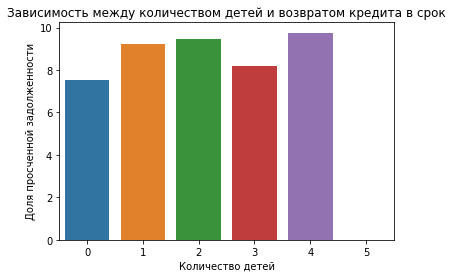

In [24]:
# построим гистограмму по сводным данным таблицы

import seaborn as sns
children = [0, 1, 2, 3, 4, 5]
overdue_ratio =  list(data_pivot_children['overdue_ratio'])
ax = sns.barplot(x=children, y= overdue_ratio)
ax.set_xlabel('Количество детей')
ax.set_ylabel('Доля просченной задолженности')
ax.set_title('Зависимость между количеством детей и возвратом кредита в срок')

**Вывод:** 
1) Люди, у которых нет детей, в два раза чаще брали кредит по сравнению остальными 

2) Доля просроченной задолженности в общем объеме выданных займов у бездетных людей самая низкая ~ 7,5%                          (если не брать в расчет людей с 5 детьми, но по ним выборка данных очень мала и не является репрезентативной). 

3) Для заемщиков с одним, двумя и четырьмя детьми процент просрочки по кредитам сравним и составляет ~ 9,5%

4) У заемщиков с тремя детьми доля кредитов, не возвращенных в срок, ниже, чем у остальных категорий заемщиков с детьми, она составляет ~ 8,2%

Таким образом, гипотеза о зависимости количества детей и возврата кредита в срок частично оправдалась. Люди с детьми действительно чаще имеют просроченную задолженность. Однако прямой зависимости между количеством детей и долей невозвратов в срок не наблюдается.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [25]:
#строим сводную таблицу по данным, сгруппированным по семейному положению (family status) 
# количеству выданных кредитов и просроченной задолженности
data_pivot_family_status =  data.pivot_table(index='family_status', values = 'debt', aggfunc=['count', 'sum'])

#добавим столбец overdue_ratio, домножим на 100, чтобы получить данные в %
data_pivot_family_status['overdue_ratio'] = (data_pivot_family_status['sum'] / data_pivot_family_status['count'])*100 

# переименуем столбцы для наглядности представления
data_pivot_family_status = data_pivot_family_status.rename(columns = {'count' : 'total_loans', 'sum': 'debts', 'debt':' '})

#выведем сводную таблицу, отсортированную по столбцу overdue_ratio
data_pivot_family_status_sorted = data_pivot_family_status.sort_values(by='overdue_ratio')
data_pivot_family_status_sorted

,total_loans,debts,overdue_ratio
,,,
family_status,,,
вдовец / вдова,951,63,6.624606
в разводе,1189,84,7.064760
женат / замужем,12261,927,7.560558
гражданский брак,4134,385,9.313014
Не женат / не замужем,2796,273,9.763948


Text(0.5, 1.0, 'Зависимость между семейным положением и возвратом кредита в срок')

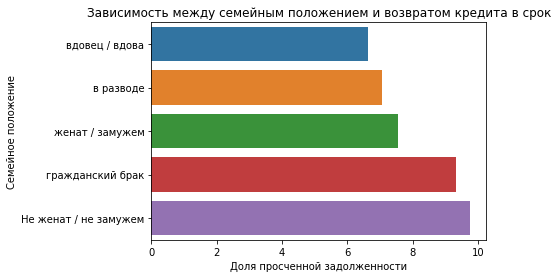

In [26]:
# построим гистограмму по сводным данным отсортированной таблицы

family_status = ['вдовец / вдова', 'в разводе', 'женат / замужем', 'гражданский брак', 'Не женат / не замужем']
overdue_ratio =  list(data_pivot_family_status_sorted['overdue_ratio'])
ax = sns.barplot(y = family_status, x = overdue_ratio)
ax.set_ylabel('Семейное положение')
ax.set_xlabel('Доля просченной задолженности')
ax.set_title('Зависимость между семейным положением и возвратом кредита в срок')

**Вывод:** 
    
    Люди, состоящие в браке на момент получения кредита (категория 'женат/замужем') или состоявшие в браке ранее (категории 'вдовец/вдова' и 'в разводе'), имеют более низкий процент невозвратов по кредитам (от 6,62% до 7,52%), по сравнению с остальными заемщиками (категории 'гражданский брак' - 9,31% и 'не женат/не замужем' - 9,76%).
    
    Гипотеза о наличии взаимосвязи между семейным положением и возвратом кредита в срок оправдалась.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [27]:
#строим сводную таблицу по данным, сгруппированным по категории дохода заемщика (total_income_category) 
# количеству выданных кредитов и просроченной задолженности
data_pivot_total_income_category =  data.pivot_table(index='total_income_category', values = 'debt', aggfunc=['count', 'sum'])

#добавим столбец overdue_ratio, домножим на 100, чтобы получить данные в %
data_pivot_total_income_category['overdue_ratio'] = (data_pivot_total_income_category['sum'] / data_pivot_total_income_category['count'])*100 

# переименуем столбцы для наглядности представления
data_pivot_total_income_category = data_pivot_total_income_category.rename(columns = {'count' : 'total_loans', 'sum': 'debts', 'debt':' '})
data_pivot_total_income_category

,total_loans,debts,overdue_ratio
,,,
total_income_category,,,
A,25,2,8.000000
B,5014,354,7.060231
C,15921,1353,8.498210
D,349,21,6.017192
E,22,2,9.090909



Согласно данным сводной таблицы, более 98% выданных кредитов приходятся на заемщиков с категориями доходов B и С. 
При этом категория заемщиков с доходом уровня С (доход: 50001–200000) является наиболее рисковой (доля невозвратов по ней составила ~ 8,5%) 
по сравнению с заемщиками с уровнем B (доход 200001–1000000). Доля просроченных задолженностей этой категории составила ~ 7,1%

Оставшиеся 2% кредитов приходятся на категории A, D и E. 
Выборки для этих категорий очень малы и недостаточно репрезентативны для проведения анализа данных.


Text(0.5, 1.0, 'Зависимость между уровнем дохода и возвратом кредита в срок')

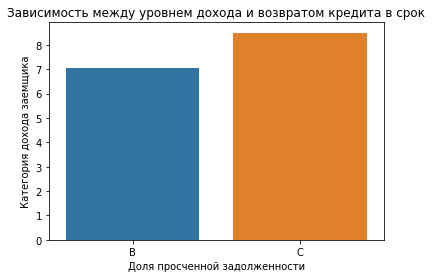

In [28]:
# построим гистограмму по сводным данным таблицы для тех групп заемщиков, выборка по которым является репрезентативной

total_income_category = ['B','C']
overdue_ratio =  [7.06, 8.50]
ax = sns.barplot(x = total_income_category, y = overdue_ratio)
ax.set_ylabel('Категория дохода заемщика')
ax.set_xlabel('Доля просченной задолженности')
ax.set_title('Зависимость между уровнем дохода и возвратом кредита в срок')

 <b> Вывод: </b>

 Гипотеза о наличии взаимосвязи уровнем дохода и возвратом кредита в срок оправдалась частично.
 Выборка оказалась репрезентативной только для двух категорий заемщиков.
 Среди них можно выделить наиболее рискованную с точки зрения невозврата займа категорию - это заемщики с уровнем дохода C
 (доход от 50001 до 200000). Группа B явлется менее рисковой (доход от 200001 до 1000000).
    
 Об остальных группах заемщиков сделать выводы по имеющимся данным не представляется возможным.


#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [29]:
#строим сводную таблицу по данным, сгруппированным по категории цели займа (purpose_category) 
# количеству выданных кредитов и просроченной задолженности
data_pivot_purpose_category =  data.pivot_table(index='purpose_category', values = 'debt', aggfunc=['count', 'sum'])

#добавим столбец overdue_ratio, домножим на 100, чтобы получить данные в %
data_pivot_purpose_category['overdue_ratio'] = (data_pivot_purpose_category['sum'] / data_pivot_purpose_category['count'])*100 

# переименуем столбцы для наглядности представления
data_pivot_purpose_category = data_pivot_purpose_category.rename(columns = {'count' : 'total_loans', 'sum': 'debts', 'debt':' '})

#выведем сводную таблицу, отсортированную по столбцу overdue_ratio
data_pivot_purpose_category_sorted = data_pivot_purpose_category.sort_values(by='overdue_ratio')

data_pivot_purpose_category_sorted 

,total_loans,debts,overdue_ratio
,,,
purpose_category,,,
операции с недвижимостью,10751,780,7.255139
проведение свадьбы,2313,183,7.911803
получение образования,3988,369,9.252758
операции с автомобилем,4279,400,9.347978


Text(0.5, 1.0, 'Зависимость между целью кредита и возвратом кредита в срок')

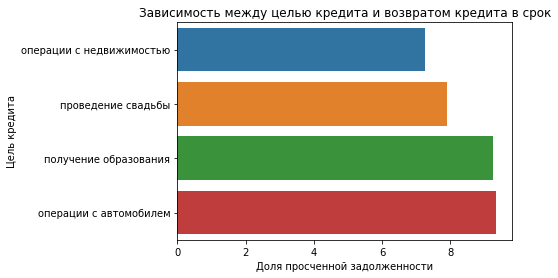

In [30]:
# построим гистограмму по сводным данным отсортированной таблицы

purpose_category = ['операции с недвижимостью', 'проведение свадьбы', 'получение образования', 'операции с автомобилем']
overdue_ratio =  list(data_pivot_purpose_category_sorted['overdue_ratio'])
ax = sns.barplot(y = purpose_category, x = overdue_ratio)
ax.set_ylabel('Цель кредита')
ax.set_xlabel('Доля просченной задолженности')
ax.set_title('Зависимость между целью кредита и возвратом кредита в срок')

**Вывод:** 

Чаще всего заемщики брали кредит с целью проведения операций с недвижимостью (примерно половина всего исследуемого объема данных), при этом для банка данные займы были наименее рискованными, так как процент невозвратов по ним минимальный по выборке (7,26 %). Также достаточно низкий риск невозврата наблюдается по займам категории "проведение свадьбы", доля просроченной задолженности составила 7,91%, однако эта категория кредитов наименее популярна.

Востребованными и при этом достаточно рискованными для банка категориями займов являются кредиты с целью получения образования и проведения операций с автомобилем. Доля просроченной задолженности по ним составила 9,25% и 9,35% соответственно.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* 

Пропуски присутствуют в столбцах days_employed (трудовой стаж) и total_income (ежемесячный доход).

Причины появления пропусков могут быть следующие:
1. Ошибки ввода данных
2. Намеренное сокрытие информации о занятости и доходах
3. Недостаток информации (например, нет необходимых справок с рабочего места при подтверждении получения кредита)
4. Потеря части данных при переносе информации с одного носителя на другой
5. Технологические ошибки обработки данных 

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* 

Выбирая из простых методов работы с пропусками, заполнение пропусков медианой в данном случае наиболее целесообразно, поскольку позволяет:
- сохранить весь объем данных (выборка сократилась бы более чем на 10%, если бы строки с пропущенными данными были удалены)


- избежать влияния выбросов на результаты исследования (Артефакты есть, например, в столбце со значениями трудового стажа days_employed. Такие выбросы сильно смещают значение среднего показателя, поэтому замена пропуска средним также менее предпочтительна)


- в меньшей степени исказить статистические свойства набора данных (Данные группируются, замена происходит с учетом группы. Данные столбца days_employed не влияют на результаты исследования, а пропущенные данные столбца total_income заменяются медианой группы, что приводит к большей репрезентативности метрик выборки).
    

### Шаг 4: общий вывод.

Напишите ваш общий вывод.

Мы исследовали статистику о платёжеспособности клиентов для определения факторов, влияющих на возврат кредита в срок, с целью построения модели кредитного скоринга.

На этапе предобработки данных столкнулись с проблемой пропусков данных, а также наличия явных и неявных дубликатов. 
Пропуски было решено заменить медианным значением по сгруппированным данным. 
Явные дубликаты были удалены, неявные - приведены к единому формату.

Далее были проверены гипотезы, и сделаны следующие выводы:

    1. Есть зависимость между количеством детей и возвратом кредита в срок
    
    Гипотеза подтвердилась частично. Люди с детьми чаще имеют просроченную задолженность, 
    но прямой зависимости между количеством детей и долей невозвратов в срок не наблюдается.
    
    2. Есть зависимость между семейным положением и возвратом кредита в срок
    Гипотеза подтвердилась. Люди, состоящие в браке или когда-либо состоявшие в браке ранее, 
    являются менее рискованной категорией заемщиков по сравнению с теми, кто официально одинок.
    
    3. Есть зависимость между уровнем дохода и возвратом кредита в срок
    Гипотеза подтвердилась частично. Выборка является репрезентативной только для двух категорий заемщиков, среди них 
    найдена наиболее рискованная - это заемщики с доходом уровня C (доход от 50001 до 200000).
    
    4. Цель кредита влияет на его возрат в срок
    Гипотеза подтвердилась. 
    Выданные займы можно ранжировать как менеее рискованные или более рискованные для банка в зависимости от их цели.
    
<b> Рекомендации </b>

При проведении кредитного скоринга  потенциального заемщика следует оценить следующие параметры:
- наличие/отсутствие у заемщика детей (бездетный, 1-2 ребенка или многодетный)
- семейное положение (находится ли в браке на текущий момент или был когда-либо в браке ранее)
- принадлежит ли к рисковой группе по уровню дохода
- цель кредита

Кроме того, если это возможно, следует увеличить изучаемую выборку данных для улучшения репрезентативности результатов исследований по различным группам заемщиков.